In [1]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import CONFIG
import DBPARSE
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend


Welcome to JupyROOT 6.26/06


In [2]:
pas="1"
config="3"
#Q2nominal=6.83

# Quasi-Elastic Cuts 

In [3]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")
nBins=CONFIG.Function_JSON("nBins",f"../config/cuts{config}.cfg")

#kin3
#dymin=-.7895
#dymax=.7895
#W2max=1.2
#dybgmin=-1.2
#dybgmax=1.2
#dxmin=-.5
#dxmax=.5
print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'nBins: {nBins}')
#nBins=150
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: -0.5
W2max: 1.7
dxmin: -0.4
dxmax: 0.4
dymin: -0.5
dymax: 0.5
dybgmin: -1.3
dybgmax: 1.2
nBins: 100
Coin Min: 88 Coin Max: 100


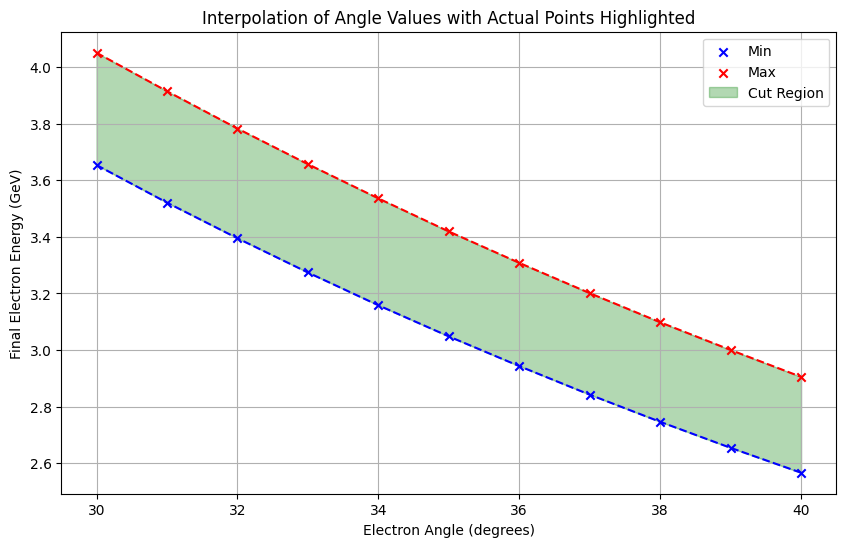

In [4]:

# Create the data frame from the provided values
data = {
    "p_fermi": [0.075] * 11,
    "angle": [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    "min": [3.654, 3.521, 3.395, 3.274, 3.158, 3.048, 2.943, 2.842, 2.746, 2.654, 2.566],
    "max": [4.051, 3.915, 3.783, 3.657, 3.536, 3.419, 3.308, 3.201, 3.098, 3.000, 2.905]
}

df = pd.DataFrame(data)

# Perform interpolation for angle values between 30 and 40
interpolated_angles = np.linspace(30, 40, 100)

# Interpolating the min and max values
min_interp = np.interp(interpolated_angles, df['angle'], df['min'])
max_interp = np.interp(interpolated_angles, df['angle'], df['max'])

# Plot the interpolation
plt.figure(figsize=(10, 6))
plt.plot(interpolated_angles, min_interp, linestyle='--', color='blue')
plt.plot(interpolated_angles, max_interp, linestyle='--', color='red')

# Plot the actual points
plt.scatter(df['angle'], df['min'], color='blue', label='Min',marker='x', zorder=5)
plt.scatter(df['angle'], df['max'], color='red', label='Max',marker='x', zorder=5)
plt.fill_between(interpolated_angles, min_interp, max_interp, color='green', alpha=0.3, label='Cut Region')
# Add labels and title
plt.title('Interpolation of Angle Values with Actual Points Highlighted')
plt.xlabel('Electron Angle (degrees)')
plt.ylabel('Final Electron Energy (GeV)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [5]:
fileDIR=(f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
resolved_path = os.path.abspath(fileDIR)
print(f"Resolved Path: {resolved_path}")
print(f"File Exists: {os.path.exists(resolved_path)}")

Resolved Path: /home/research/GEn/GEn Data Analysis/outfiles/Pass1/QE_data_GEN3_sbs100p_nucleon_np_model2.root
File Exists: True


In [6]:
import ROOT as r


def list_branches(rootfile_path, tree_name="Tout"):
    # Open the ROOT file
    root_file = r.TFile.Open(rootfile_path)
    
    # Check if the file was successfully opened
    if not root_file or root_file.IsZombie():
        print(f"Error: Could not open ROOT file '{rootfile_path}'.")
        return
    
    # Access the TTree
    tree = root_file.Get(tree_name)
    
    # Check if the tree exists
    if not tree:
        print(f"Error: Tree '{tree_name}' not found in file '{rootfile_path}'.")
        root_file.Close()
        return
    
    # Get the list of branches
    branch_list = tree.GetListOfBranches()
    
    # Print all branch names
    print(f"Branches in tree '{tree_name}':")
    for branch in branch_list:
        print(branch.GetName())
    
    # Close the ROOT file
    root_file.Close()

# Example usage
rootfile_path = f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root"
list_branches(rootfile_path)


Branches in tree 'Tout':
runnum
WCut
pCut
nCut
fiduCut
coinCut
ebeam
nu
Q2
W2
dpel
ephi
etheta
pcentral
vz
vx
vy
xtgt
ytgt
thtgt
phtgt
thetabend
xfp
yfp
thfp
phfp
trP
trPx
trPy
trPz
ePS
xPS
eSH
xSH
ySH
eHCAL
xHCAL
yHCAL
xHCAL_exp
yHCAL_exp
dx
dy
ngrinch_hits
xGRINCH
yGRINCH
coin_time
hcal_time
bbcal_time
nhodo_clus
hodo_time
BPMAx
BPMAy
Rasterx
Rastery
Raster2x
Raster2y
helicity
IHWP


In [9]:
def EnergyAngle(config):
    C = TChain("Tout")
    rootfilenp = (f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")

    C.Add(rootfilenp)

    
    
    # Disable all branches initially
    C.SetBranchStatus("*", 0)

    # Enable specific branches
    branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time","trPx","trPy",
                "trPz,etheta"]
    
#for branch in branches:
    #    C.SetBranchStatus(branch, 1)
    
    
    C.SetBranchStatus("dx", 1)
    C.SetBranchStatus("dy", 1)
    C.SetBranchStatus("W2", 1)
    C.SetBranchStatus("trPx", 1)
    C.SetBranchStatus("trPy", 1)
    C.SetBranchStatus("trPz", 1)
    C.SetBranchStatus("etheta", 1)
    C.SetBranchStatus("coin_time", 1)
   
    dx=array.array('d',[0])
    dy=array.array('d',[0])
    W2=array.array('d',[0])

    px=array.array('d',[0])
    py=array.array('d',[0])
    pz=array.array('d',[0])
    etheta=array.array('d',[0])
    coin=array.array('d',[0])
    
    
    # Set branch addresses
    C.SetBranchAddress("dx", dx)
    C.SetBranchAddress("dy", dy)
    C.SetBranchAddress("trPx", px)
    C.SetBranchAddress("trPy", py)
    C.SetBranchAddress("trPz", pz)
    C.SetBranchAddress("etheta", etheta)

    
    #C.SetBranchAddress("dy", dy_np)
    C.SetBranchAddress("W2", W2)
    #C.SetBranchAddress("helicity", helicity_np)
    #C.SetBranchAddress("IHWP", IHWP_np)
    C.SetBranchAddress("coin_time", coin)
    #C.SetBranchAddress("runnum", runnum_np)
    
    Entries=C.GetEntries()
    
    energy=[]
    angle=[]
    energyCuts=[]
    angleCuts=[]
    dx_array=[]
    dy_array=[]
    energyCuts2=[]
    angleCuts2=[]
    dx_array2=[]
    dy_array2=[]
    for i in range(0,Entries):
        C.GetEntry(i)
        
        
        wcut=W2min<W2[0]<W2max
        dxcut=dxmin<dx[0]<dxmax
        dycut=dymin<dy[0]<dymax
        
        
        
        ########################EnergyCut##########################
        thisAngle=180/math.pi*etheta[0]
        
        closest_idx = np.argmin(np.abs(interpolated_angles - thisAngle ))
    
        interpAngle=interpolated_angles[closest_idx]
        min_val = min_interp[closest_idx]
        max_val = max_interp[closest_idx]
        
        bigP=np.sqrt(px[0]**2+py[0]**2+pz[0]**2)
        hptotal=bigP
        hetotal=np.sqrt(bigP**2+.000511**2)
        
        energyCut=min_val<hetotal<max_val
        ########################EnergyCut##########################
        
        coin_cut = coinmin < coin[0] < coinmax

        cut1=energyCut and coin_cut
        cut2=wcut and coin_cut
        
        
        
        
        
        
        
        
        
        if i % 10000 == 0 or i == Entries - 1:
                progress = f'Processing entry {i + 1}/{Entries} ({(i + 1) / Entries * 100:.2f}%)\r'
                sys.stdout.write(progress)
                sys.stdout.flush()
        
        
        energy.append(hetotal)
        angle.append(etheta[0])
        if cut1:
            bigP=np.sqrt(px[0]**2+py[0]**2+pz[0]**2)
            hptotal=bigP
            hetotal=np.sqrt(bigP**2+.000511**2)
            energyCuts.append(hetotal)
            angleCuts.append(etheta[0])
            dx_array.append(dx[0])
            dy_array.append(dy[0])
        if cut2:
            bigP=np.sqrt(px[0]**2+py[0]**2+pz[0]**2)
            hptotal=bigP
            hetotal=np.sqrt(bigP**2+.000511**2)
            energyCuts2.append(hetotal)
            angleCuts2.append(etheta[0])
            dx_array2.append(dx[0])
            dy_array2.append(dy[0])
            
            
            
    return [energy,np.array(angle)*180/math.pi,dx],[energyCuts,np.array(angleCuts)*180/math.pi,dx_array
                                                    ,dy_array],[energyCuts2,np.array(angleCuts2)*180/math.pi,dx_array2,dy_array2]

In [10]:
eaNoCuts,eaCuts1,eaCuts2=EnergyAngle(config)

In [11]:
energy_nc=eaNoCuts[0]
angle_nc=eaNoCuts[1]
dx1=eaCuts1[2]
dy1=eaCuts1[3]
energy_c=eaCuts1[0]
angle_c=eaCuts1[1]
dx2=eaCuts2[2]
dy2=eaCuts2[3]
energy_c=eaCuts2[0]
angle_c=eaCuts2[1]

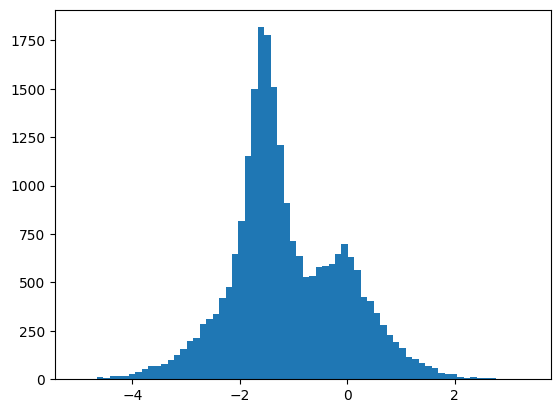

In [12]:
dxHist=plt.hist(dx1,bins=70)

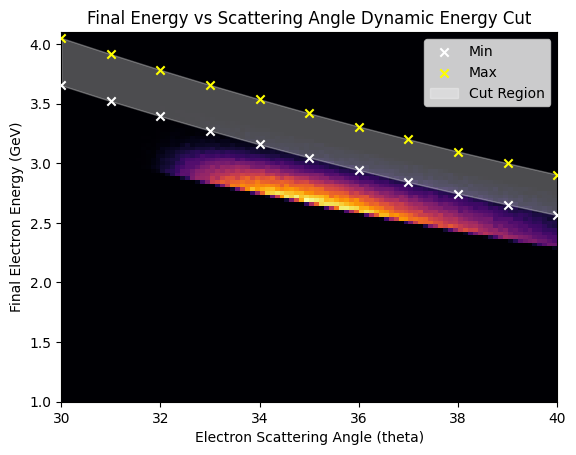

In [13]:
angleenergyhist=plt.hist2d(angle_c,energy_c,bins=100,range=((30,40),(1,4.1)),cmap='inferno')
plt.scatter(df['angle'], df['min'], color='white', label='Min',marker='x', zorder=5)
plt.scatter(df['angle'], df['max'], color='yellow', label='Max',marker='x', zorder=5)
plt.fill_between(interpolated_angles, min_interp, max_interp, color='white', alpha=0.3, label='Cut Region')
plt.xlabel("Electron Scattering Angle (theta)")
plt.ylabel("Final Electron Energy (GeV)")
plt.title("Final Energy vs Scattering Angle Dynamic Energy Cut")
plt.legend(loc='upper right')

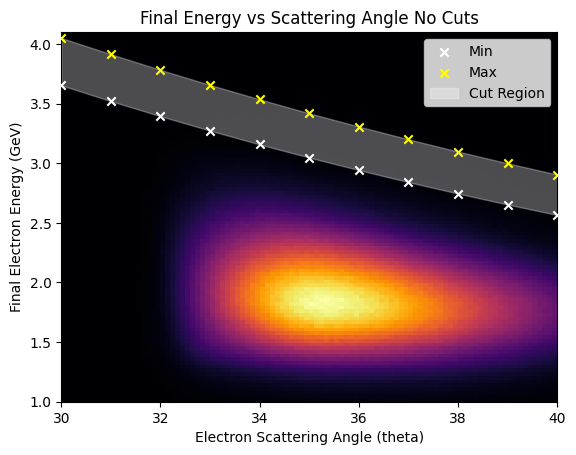

In [21]:
angleenergyhist=plt.hist2d(angle_nc,energy_nc,bins=100,range=((30,40),(1,4.1)),cmap='inferno')
plt.scatter(df['angle'], df['min'], color='white', label='Min',marker='x', zorder=5)
plt.scatter(df['angle'], df['max'], color='yellow', label='Max',marker='x', zorder=5)
plt.fill_between(interpolated_angles, min_interp, max_interp, color='white', alpha=0.3, label='Cut Region')
plt.xlabel("Electron Scattering Angle (theta)")
plt.ylabel("Final Electron Energy (GeV)")
plt.title("Final Energy vs Scattering Angle No Cuts")
plt.legend(loc='upper right')

# dx vs dy with w2 cut and then with energy cut

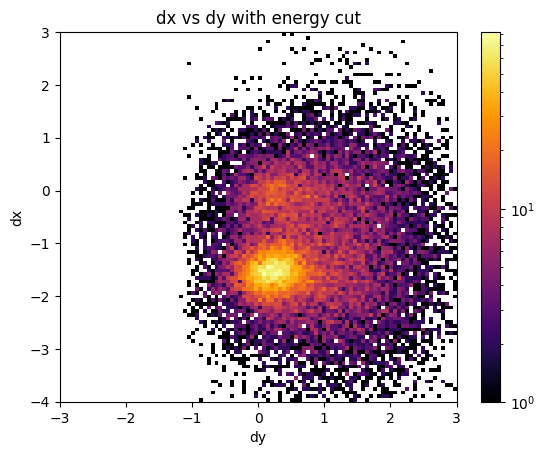

In [35]:
energycuthist=plt.hist2d(dy1,dx1,bins=100,range=((-3,3),(-4,3)),cmap='inferno')

plt.xlabel("dy")
plt.ylabel("dx")
plt.title("dx vs dy with energy cut")
plt.colorbar()

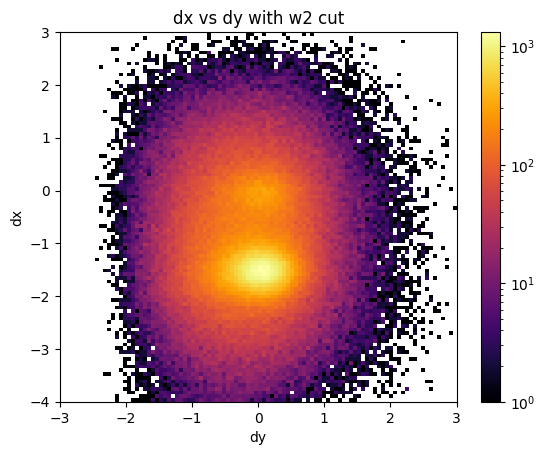

In [34]:
w2cuthist=plt.hist2d(dy2,dx2,bins=100,range=((-3,3),(-4,3)),cmap='inferno',norm=LogNorm())

plt.xlabel("dy")
plt.ylabel("dx")
plt.title("dx vs dy with w2 cut")
plt.colorbar()

In [120]:

def asymmetrySIMFIT(config,dynamic=0):
    r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages
    gStyle.SetOptStat(0)
    gStyle.SetOptFit(1)

    #_____bring in config values______#
    coinVector=CONFIG.Function_JSON("GEN"+config,"../config/coin.cfg")
    he3spot=CONFIG.Function_JSON("GEN"+config+"He3","../config/spotsize.cfg")
    he3spotsim=CONFIG.Function_JSON("GEN"+config+"He3sim","../config/spotsize.cfg")
    
    #here, set coincidence cut and spot cut values
    coinSigma=2.5
    coin_low=coinVector[0]-coinSigma*coinVector[1]
    coin_high=coinVector[0]+coinSigma*coinVector[1]

    #spot imports for dx,dy high and low
    
    hiydata=he3spot[1];
    lowydata=he3spot[0];
    
    hixdatan=he3spotsim[7];
    lowxdatan=he3spotsim[6];
    hixdatap=he3spotsim[5];
    lowxdatap=he3spotsim[4];
    
    hix_n_3 = he3spotsim[7]
    lowx_n_3 = he3spotsim[6]
    hix_p_3 = he3spotsim[5]
    lowx_p_3 = he3spotsim[4]
    hiy_p3 = he3spotsim[1]
    lowy_p3 = he3spotsim[0]
    hiy_n3 = he3spotsim[3]
    lowy_n3 = he3spotsim[2]
    

    rxn3 = (hix_n_3 - lowx_n_3) / 2.0
    rxp3 = (hix_p_3 - lowx_p_3) / 2.0
    ryp3 = (hiy_p3 - lowy_p3) / 2.0
    ryn3 = (hiy_n3 - lowy_n3) / 2.0



    x0_n3 = (hix_n_3 + lowx_n_3) / 2.0
    x0_p3 = (hix_p_3 + lowx_p_3) / 2.0
    y0_3 = (hiy_p3 + lowy_p3) / 2.0


    
    #-------------------------------------
    rootfilenp = (f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
    rootfilep = (f"../outfiles/Pass1/QE_sim_GEN{config}_sbs100p_nucleon_np_model2.root")
    rootfileIn=f"../outfiles/Pass1/QE_Insim2_GEN{config}_sbs100p_nucleon_np_model2.root"
    rootfileIn=f"../outfiles/Pass1/QE_Insim2_GEN{4}_sbs100p_nucleon_np_model2.root"

    
    C = TChain("Tout")
    B = TChain("Tout")
    
    C.Add(rootfilenp)
    B.Add(rootfilep)
    D = TChain("Tout")
    D.Add(rootfileIn)
    D.SetBranchStatus("*", 0)
    
    px,py,pz = array.array('d', [0]),array.array('d', [0]),array.array('d', [0])
    
    dx_p, dy_p, W2_p, coin_p,fnucl,Q2  = array.array('d', [0]),array.array('d', [0]),array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])
    dx_np, dy_np, W2_np, coin_np, weight = array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])
    helicity_p, IHWP_p, runnum_p = array.array('i', [0]), array.array('i', [0]), array.array('i', [0])
    helicity_np, IHWP_np, runnum_np= array.array('i', [0]), array.array('i', [0]), array.array('i', [0])
    weight_In,dx_In,dy_In,W2_In,MC_sig=array.array('d', [0]),array.array('d', [0]),array.array('d', [0]), array.array('d', [0]), array.array('d', [0])

    # Disable all branches initially
    C.SetBranchStatus("*", 0)
    B.SetBranchStatus("*", 0)

    # Enable specific branches
    branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time","Q2"]
    b2=["dx", "dy", "W2"]
    for branch in branches:
        C.SetBranchStatus(branch, 1)
    for branch in b2:
        B.SetBranchStatus(branch, 1)
        D.SetBranchStatus(branch, 1)
    
    C.SetBranchStatus("trPx", 1)
    C.SetBranchStatus("trPy", 1)
    C.SetBranchStatus("trPz", 1)
    
    C.SetBranchAddress("trPx", px)
    C.SetBranchAddress("trPy", py)
    C.SetBranchAddress("trPz", pz)
    
    B.SetBranchStatus("weight", 1)
    D.SetBranchStatus("weight", 1)
    D.SetBranchStatus("mc_sig",1)
    B.SetBranchStatus("fnucl",1)
    # Set branch addresses
    C.SetBranchAddress("dx", dx_np)
    C.SetBranchAddress("Q2", Q2)
    B.SetBranchAddress("dx", dx_p)
    C.SetBranchAddress("dy", dy_np)
    B.SetBranchAddress("dy", dy_p)
    C.SetBranchAddress("W2", W2_np)
    B.SetBranchAddress("W2", W2_p)
    C.SetBranchAddress("helicity", helicity_np)
    #B.SetBranchAddress("helicity", helicity_p)
    C.SetBranchAddress("IHWP", IHWP_np)
    #B.SetBranchAddress("IHWP", IHWP_p)
    C.SetBranchAddress("coin_time", coin_np)
    #B.SetBranchAddress("coin_time", coin_pp)
    C.SetBranchAddress("runnum", runnum_np)
    #B.SetBranchAddress("runnum", runnum_p)
    B.SetBranchAddress("weight", weight)
    B.SetBranchAddress("fnucl", fnucl)
    D.SetBranchAddress("dx", dx_In)
    D.SetBranchAddress("dy", dy_In)
    D.SetBranchAddress("W2", W2_In)
    D.SetBranchAddress("weight", weight_In)
    D.SetBranchAddress("mc_sig",MC_sig)

    
    
    
    
    
    
    C.SetBranchStatus("etheta", 1)
    
   
    etheta=array.array('d',[0])
    
    
    
    # Set branch addresses
    
    C.SetBranchAddress("etheta", etheta)
    
    
    
    
    
    
    
    # Assuming the variables are already defined or loaded from the ROOT file
    nbins=nBins    
    xmin, xmax = -4, 2.5
    if config=="2":
        xmin=-5.5
        xmax=2.8
    hdx_bg_sim=r.TH1F("hdx_bg_sim","Inelastic Simulation 1d",nbins,xmin,xmax) 
    hdx_total_data = TH1F("hdx_total_data", "#Deltax;#Deltax;Entries", nbins, xmin, xmax)
    hdx_total_sim = TH1F("hdx_total_sim", "#Deltax;#Deltax;Entries", 100, -6, 4)
    hdx_p = TH1F("hdx_p", "#Deltax for helicity +1;#Deltax;Entries", 100, -6, 4)
    hdx_m = TH1F("hdx_m", "#Deltax for helicity -1;#Deltax;Entries", 100, -6, 4)
    
    hdx_data_plus = TH1F("hdx_data_plus", "", nbins, xmin, xmax)
    hdx_data_minus = TH1F("hdx_data_minus", "", nbins, xmin, xmax)
    hdx_sim_p = TH1F("hdx_sim_p", "", nbins, xmin, xmax)
    hdx_sim_n = TH1F("hdx_sim_n", "", nbins, xmin, xmax)
    hdx_bg_data = TH1F("hdx_bg_data", "", nbins, xmin, xmax)
    hdx_bg_data_plus = TH1F("hdx_bg_data_plus", "", nbins, xmin, xmax)
    hdx_bg_data_minus = TH1F("hdx_bg_data_minus", "", nbins, xmin, xmax)
    
    number=0
    nEntries_np = C.GetEntries()
    for i in range(nEntries_np):
        C.GetEntry(i)

        #if Q2[0]!=0:
        #    fractionQ2=abs(Q2[0]-Q2nominal)/Q2[0]
        #else:
        #    fractionQ2=0
        if IHWP_np[0] == 1:
            helicity_np[0] *= -1
        elif IHWP_np[0] == -1:
            helicity_np[0] *= 1
        else:
            continue    
        
#____________CUTS_______________________________      
        if dynamic==1:
            ycut = dymin-dymin*fractionQ2 < dy_np[0] < dymax+dymax*fractionQ2
        if dynamic==0:
            ycut = dymin < dy_np[0] < dymax
        bgycut=dybgmin<dy_np[0]<dybgmax
        coin_cut = coinmin < coin_np[0] < coinmax
        W2cut=W2min < W2_np[0] < W2max
        ########################EnergyCut##########################
        thisAngle=180/math.pi*etheta[0]
        
        closest_idx = np.argmin(np.abs(interpolated_angles - thisAngle ))
    
        interpAngle=interpolated_angles[closest_idx]
        min_val = min_interp[closest_idx]
        max_val = max_interp[closest_idx]
        
        bigP=np.sqrt(px[0]**2+py[0]**2+pz[0]**2)
        hptotal=bigP
        hetotal=np.sqrt(bigP**2+.000511**2)
        
        energyCut=min_val<hetotal<max_val
        ########################EnergyCut##########################
        
        
        
        
        
        
        
        
        
        
#________________________________________________     

        #if coin_cut and W2cut and runnum_np[0] > 2165 and not bgycut:
        if coin_cut and energyCut and runnum_np[0] > 2165 and not bgycut:
            hdx_bg_data.Fill(dx_np[0])
            if helicity_np[0] == 1:
                hdx_bg_data_plus.Fill(dx_np[0])
            if helicity_np[0] == -1:
                hdx_bg_data_minus.Fill(dx_np[0])

        #if coin_cut and W2cut and runnum_np[0] > 2165 and ycut:
        if coin_cut and energyCut and runnum_np[0] > 2165 and ycut:
            number+=1
            hdx_total_data.Fill(dx_np[0])
            if helicity_np[0] == 1:
                hdx_data_plus.Fill(dx_np[0])
            if helicity_np[0] == -1:
                hdx_data_minus.Fill(dx_np[0])
    
    # Simulation loop
    nEntries_p = B.GetEntries()
    
    for i in range(nEntries_p):
        B.GetEntry(i)
        

        #ncut = (dx_p[0] - x0_n3)**2 / rxn3**2 + (dy_p[0] - y0_3)**2 / ryn3**2 <= 1
        #pcut = (dx_p[0] - x0_p3)**2 / rxp3**2 + (dy_p[0] - y0_3)**2 / ryp3**2 <= 1
        ##temp testing-------------------------------
       # ycut = lowydata < dy_p[0] < hiydata
        #xcutn = lowxdatan < dx_p[0] < hixdatan
       # #xcutp = lowxdatap < dx_p[0] < hixdatap
        ######---------------------------------------
                
        #____________CUTS_______________________________      
        ycut = dymin < dy_p[0] < dymax
        
        
        
        W2cut=W2min < W2_p[0] < W2max
        
        
        
        #________________________________________________ 
        
        #temp replace pcut with ycut+xcut
        #print(fnucl)
        #if W2_p[0] < W2max and ycut and fnucl[0]==1:
        #    hdx_sim_p.Fill(dx_p[0], weight[0])
        #if W2_p[0] < W2max and ycut and fnucl[0]==0:
        #    hdx_sim_n.Fill(dx_p[0], weight[0])
        if W2cut and ycut and fnucl[0]==1:
            hdx_sim_p.Fill(dx_p[0], weight[0])
        if W2cut and ycut and fnucl[0]==0:
            hdx_sim_n.Fill(dx_p[0], weight[0])
    
    nEntries_In = D.GetEntries()
    for i in range(nEntries_In):
        D.GetEntry(i)
        
        #____________CUTS_______________________________      
        ycut = dymin < dy_In[0] < dymax
        W2cut = W2min < W2_In[0] < W2max
        #________________________________________________ 
        #if ycut:
        if W2cut:
            hdx_bg_data.Fill(dx_In[0],MC_sig[0]*1e28)

        #hdx_bg_sim.Fill(dx_In[0])

    # Fit distributions
    cfg = f"GEN{config}"
    print(cfg)
    
    dists = DistributionFits(bg_shape_option="pol4" if cfg == "GEN2" else "from data")
    dists.hdx_data = (np.array([hdx_total_data.GetBinCenter(i) for i in range(1, hdx_total_data.GetNbinsX() + 1)]), 
                      np.array([hdx_total_data.GetBinContent(i) for i in range(1, hdx_total_data.GetNbinsX() + 1)]))
    dists.hdx_sim_p = (np.array([hdx_sim_p.GetBinCenter(i) for i in range(1, hdx_sim_p.GetNbinsX() + 1)]), 
                       np.array([hdx_sim_p.GetBinContent(i) for i in range(1, hdx_sim_p.GetNbinsX() + 1)]))
    dists.hdx_sim_n = (np.array([hdx_sim_n.GetBinCenter(i) for i in range(1, hdx_sim_n.GetNbinsX() + 1)]), 
                       np.array([hdx_sim_n.GetBinContent(i) for i in range(1, hdx_sim_n.GetNbinsX() + 1)]))
    dists.hdx_bg_data = (np.array([hdx_bg_data.GetBinCenter(i) for i in range(1, hdx_bg_data.GetNbinsX() + 1)]), 
                         np.array([hdx_bg_data.GetBinContent(i) for i in range(1, hdx_bg_data.GetNbinsX() + 1)]))

    hdx_bg_fit, hdx_total_fit, hdx_sim_p, hdx_sim_n = dists.He3_fit_dists()
    # Plot results
    hdx_data_plot = hdx_total_data.Clone("hdx_data_plot")
    #hdx_sim_p_plot = hdx_sim_p.Clone("hdx_sim_p_plot")
    #hdx_sim_n_plot = hdx_sim_n.Clone("hdx_sim_n_plot")
    hdx_sim_p_plot = TH1F("hdx_sim_p_plot", "", nbins, xmin, xmax)
    hdx_sim_n_plot = TH1F("hdx_sim_n_plot", "", nbins, xmin, xmax)
    hdx_bg_plot = TH1F("hdx_bg_plot", "", nbins, xmin, xmax)
    hdx_total_fit_plot = TH1F("hdx_total_fit_plot", "", nbins, xmin, xmax)

    for i in range(nbins):
        hdx_bg_plot.SetBinContent(i + 1, hdx_bg_fit[i])
        hdx_total_fit_plot.SetBinContent(i + 1, hdx_total_fit[i])
        hdx_sim_p_plot.SetBinContent(i + 1, hdx_sim_p[i])
        hdx_sim_n_plot.SetBinContent(i + 1, hdx_sim_n[i])

    gStyle.SetOptFit(0)
    
    hdx_data_plot.SetTitle(f"Data/Simulation Comparison {cfg};#Deltax (m);Entries")
    hdx_data_plot.SetMarkerStyle(r.kFullCircle)
    hdx_total_fit_plot.SetFillColorAlpha(30, 0.5)
    hdx_sim_p_plot.SetFillColorAlpha(r.kRed, 0.3)
    hdx_sim_n_plot.SetFillColorAlpha(r.kBlue, 0.3)
    hdx_bg_plot.SetFillColorAlpha(r.kMagenta, 0.3)
    
    hdx_total_fit_plot.SetLineStyle(7)
    hdx_sim_p_plot.SetLineStyle(7)
    hdx_sim_n_plot.SetLineStyle(7)
    hdx_bg_plot.SetLineStyle(7)
    
    hdx_total_fit_plot.SetLineColor(30)
    hdx_sim_p_plot.SetLineColor(r.kRed)
    hdx_sim_n_plot.SetLineColor(r.kBlue)
    hdx_bg_plot.SetLineColor(r.kMagenta)
    
    c = TCanvas("c", "", 800, 600)
    hdx_data_plot.Draw()
    hdx_total_fit_plot.Draw("same hist")
    hdx_sim_p_plot.Draw("same hist")
    hdx_sim_n_plot.Draw("same hist")
    hdx_bg_plot.Draw("same hist")
    
    legend = TLegend(0.65, 0.72, 0.89, 0.89)
    legend.AddEntry("hdx_data_plot", "Data", "p")
    legend.AddEntry("hdx_total_fit_plot", "MC Fit", "lf")
    legend.AddEntry("hdx_sim_p_plot", "MC p", "lf")
    legend.AddEntry("hdx_sim_n_plot", "MC n", "lf")
    legend.AddEntry("hdx_bg_plot", "Background", "lf")
    legend.SetLineColor(0)
    legend.Draw("same")
    
    output = f"Data_sim_total_{cfg}.pdf"
    #c.SaveAs(f"../plots/{output}")
    print(f"events passing {number}")
    return Function_HIST2NP(hdx_data_plot), Function_HIST2NP(hdx_bg_plot),Function_HIST2NP(hdx_total_fit_plot),Function_HIST2NP(hdx_sim_p_plot),Function_HIST2NP(hdx_sim_n_plot)




# Run fit function and extract histograms

In [121]:
save=asymmetrySIMFIT(config,0)

GEN3
events passing 10856


Error in <THashList::Delete>: A list is accessing an object (0xd964470) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xb6f2ac0) already deleted (list name = THashList)


In [122]:
he3spot=CONFIG.Function_JSON("GEN"+config+"He3","../config/spotsize.cfg")
hixdatan=he3spot[7];
lowxdatan=he3spot[6];

In [123]:
data,bgHist,totalHist,simpHist,simnHist = save

In [124]:
"""np.save(f'SavedArrays/GEN{config}/Pass1/GEN{config}simfit1.npy', {
    'data': data,
    'bgHist': bgHist,
    'totalHist': totalHist,
    'simpHist':simpHist,
    'simnHist':simnHist,
},allow_pickle=True)"""

"np.save(f'SavedArrays/GEN{config}/Pass1/GEN{config}simfit1.npy', {\n    'data': data,\n    'bgHist': bgHist,\n    'totalHist': totalHist,\n    'simpHist':simpHist,\n    'simnHist':simnHist,\n},allow_pickle=True)"

# Fit the neutron peak to determine quasicut

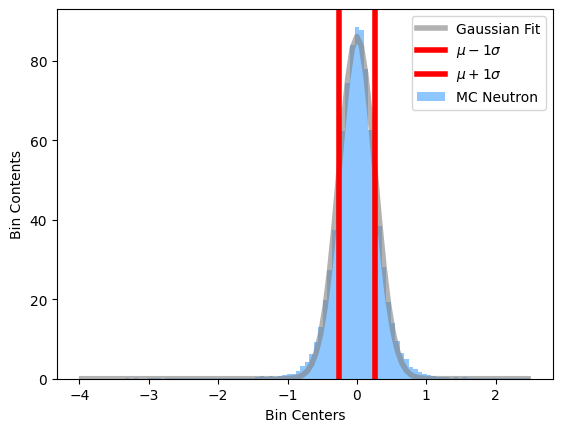

Mean: 0.0014, Standard Deviation (Sigma): 0.2601340719218845
Number of events within ±1 sigma: 587.4574
dxmin: -0.259
dxmax: 0.262


In [125]:
bin_centers,bin_contents=simnHist
sigcut=1
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

initial_guess = [max(bin_contents), bin_centers[np.argmax(bin_contents)], 1.0]

popt, pcov = curve_fit(gaussian, bin_centers, bin_contents, p0=initial_guess)

amplitude, mean, stddev = popt

plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5, color="dodgerblue", label="MC Neutron")
x_fit = np.linspace(min(bin_centers), max(bin_centers), 100)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='grey', linewidth=4,alpha=.6, label='Gaussian Fit')
plt.axvline(mean -sigcut * stddev, color='red', linewidth=4, label=f'$\mu - {sigcut}\sigma$')
plt.axvline(mean + sigcut * stddev, color='red', linewidth=4, label=f'$\mu + {sigcut}\sigma$')

plt.xlabel('Bin Centers')
plt.ylabel('Bin Contents')
plt.legend()
plt.show()
lower_bound = mean -sigcut * stddev
upper_bound = mean + sigcut * stddev

within_3sigma = np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
print(f"Mean: {np.round(mean,4)}, Standard Deviation (Sigma): {stddev}")
print(f"Number of events within ±{sigcut} sigma: {np.round(within_3sigma,4)}")
print(f'dxmin: {np.round(lower_bound,3)}')
print(f'dxmax: {np.round(upper_bound,3)}')

# Create pretty plot

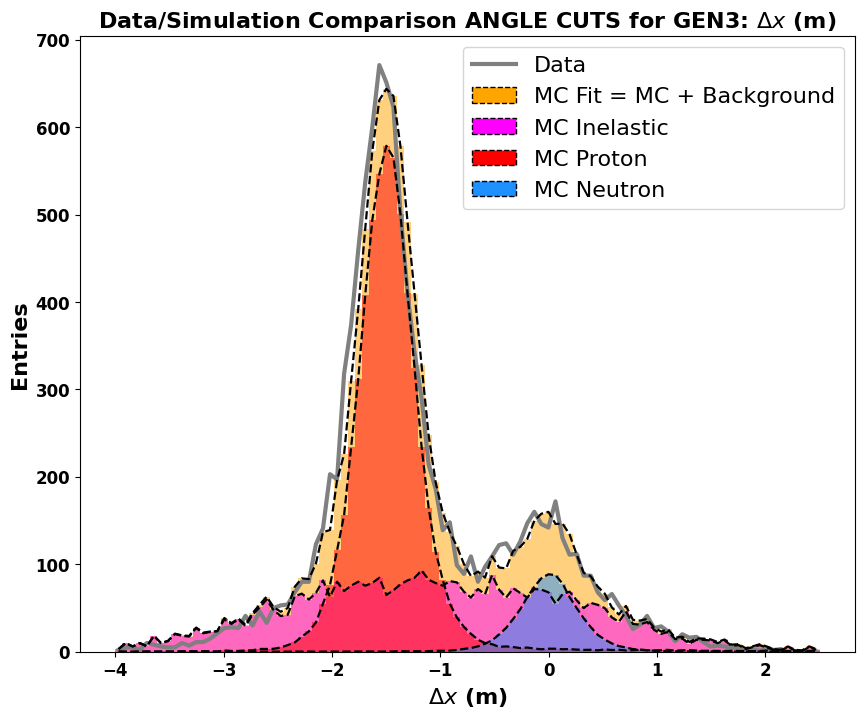

904.5005618021823

In [127]:
bin_centers,bin_contents=bgHist
plt.figure(figsize=(10,8))
lw=1.6
l=3
if config=="2":
    lw=1
    l=3
fs=16
fw='bold'

#____________Data___________________________________________________________________________________________
bin_centers,bin_contents=data
plt.plot(bin_centers, bin_contents,'-',color='grey',linewidth=l,label='Data')
#___________________________________________________________________________________________________________



#____________Total Fit = SimP + SimN + Background___________________________________________________________
bin_centers,bin_contents=totalHist
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color='orange',label="Total Fit = bg+simN+simP")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
#___________________________________________________________________________________________________________

#____________Background_____________________________________________________________________________________
bin_centers,bin_contents=bgHist
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color='magenta',label="Background Sim")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
#___________________________________________________________________________________________________________


#____________Simulated Proton_______________________________________________________________________________
bin_centers,bin_contents=simpHist
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color="red",label="MC Proton")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
#___________________________________________________________________________________________________________


#____________Simulated Neutron______________________________________________________________________________
bin_centers,bin_contents=simnHist
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color="dodgerblue",label="MC Neutron")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
#___________________________________________________________________________________________________________

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
typ="Background Data"
if config=="2":
    typ="4th Order Poly"
#_________________Special Legend Including Dotted Black Border______________________________________________
a=1
legend_elements = [
    Line2D([0], [0], color='grey', linewidth=3, linestyle='-', label='Data'),
    Patch(facecolor='orange', edgecolor='black', linestyle='--', label='MC Fit = MC + Background', alpha=a),
    Patch(facecolor='magenta', edgecolor='black', linestyle='--', label='MC Inelastic', alpha=a),
    Patch(facecolor='red', edgecolor='black', linestyle='--', label='MC Proton', alpha=a),
    Patch(facecolor='dodgerblue', edgecolor='black', linestyle='--', label='MC Neutron', alpha=a)
]
#___________________________________________________________________________________________________________

#plt.axvline(dxmin, color='black', linewidth=3,ymax=.4, label=r'$\mu - 3\sigma$')
#plt.axvline(dxmax, color='black', linewidth=3,ymax=.4, label=r'$\mu + 3\sigma$')




#print(f'{upper} {lower}')
plt.title(f'Data/Simulation Comparison ANGLE CUTS for GEN{config}: $\Delta x$ (m)',fontsize=fs,fontweight=fw)
plt.legend(handles=legend_elements,loc='upper right',fontsize=fs)
plt.xticks(fontsize=fs-4, fontweight=fw)
plt.yticks(fontsize=fs-4, fontweight=fw)
plt.xlabel(r'$\Delta x$ (m)',fontsize=fs,fontweight=fw)
plt.ylabel('Entries',fontsize=fs,fontweight=fw)
plt.savefig(f'../plots/DataSimPass{pas}GEN{config}.png')
plt.show()
np.sum(bin_contents)

# EXTRA

In [11]:
s=16000
bg=16000

s/(np.sqrt(s+bg))

89.44271909999158

In [12]:
s=10000
bg=50000
s/(np.sqrt(s+bg))

40.8248290463863

In [13]:
np.sqrt(2000)

44.721359549995796